In [1]:
# Author: Alexander Maksiaev
# Purpose: Analyze results from sentiment analysis

In [51]:
# Housekeeping: Importing libraries, switching directories, etc.

import os
import pandas as pd
import csv 
import numpy as np
from statistics import mean
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
import docx
import statsmodels.api as sm
import statsmodels.stats.multicomp as mc

os.getcwd()

results_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\GitHub_DMP\Results"

results = os.listdir(results_dir)

os.chdir(results_dir)

sns.set_palette("viridis")

In [3]:
# Getting the data frame

results_clean = []
df = pd.read_csv("sentiments_3_19_2024_autism.csv", low_memory=False)

print(df)

                          Textbook     Score
0     Abn_Barlow_04_Autism_v2.docx  0.232749
1     Abn_Barlow_05_Autism_v2.docx  0.238853
2     Abn_Barlow_06_Autism_v2.docx  0.215774
3        Abn_Barlow_07_Autism.docx  0.199671
4        Abn_Barlow_08_Autism.docx  0.219603
..                             ...       ...
213  Spcl_Vaughn_03_Autism_v2.docx  0.273949
214  Spcl_Vaughn_04_Autism_v2.docx  0.425315
215  Spcl_Vaughn_05_Autism_v2.docx  0.360749
216  Spcl_Vaughn_06_Autism_v2.docx  0.357132
217     Spcl_Vaughn_07_Autism.docx  0.327171

[218 rows x 2 columns]


                          Textbook     Score  Author Field Edition     Slope
0     Abn_Barlow_04_Autism_v2.docx  0.232749  Barlow   Abn      04 -0.006547
1     Abn_Barlow_05_Autism_v2.docx  0.238853  Barlow   Abn      05 -0.006547
2     Abn_Barlow_06_Autism_v2.docx  0.215774  Barlow   Abn      06 -0.006547
3        Abn_Barlow_07_Autism.docx  0.199671  Barlow   Abn      07 -0.006547
4        Abn_Barlow_08_Autism.docx  0.219603  Barlow   Abn      08 -0.006547
..                             ...       ...     ...   ...     ...       ...
213  Spcl_Vaughn_03_Autism_v2.docx  0.273949  Vaughn  Spcl      13 -0.038774
214  Spcl_Vaughn_04_Autism_v2.docx  0.425315  Vaughn  Spcl      13  0.000000
215  Spcl_Vaughn_05_Autism_v2.docx  0.360749  Vaughn  Spcl      02 -0.066056
216  Spcl_Vaughn_06_Autism_v2.docx  0.357132  Vaughn  Spcl      03 -0.066056
217     Spcl_Vaughn_07_Autism.docx  0.327171  Vaughn  Spcl      09  0.000000

[218 rows x 6 columns]


,Mean,Standard Deviation
Field,,
Abn,0.182556,0.074241
Devo,0.181580,0.104501
GS,0.207479,0.206815
HS,0.203725,0.134317
Intro,0.158009,0.171131
Neuro,0.180133,0.099797
Socl,0.235348,0.184692
Spcl,0.357985,0.080984


F_onewayResult(statistic=13.130433516905187, pvalue=5.3333833483776204e-14)


group1,group2,meandiff,p-adj,lower,upper,reject
Abn,Devo,-0.001,1.0,-0.079,0.077,False
Abn,GS,0.0249,1.0,-0.1855,0.2354,False
Abn,HS,0.0212,0.9998,-0.1221,0.1645,False
Abn,Intro,-0.0245,0.9843,-0.1066,0.0575,False
Abn,Neuro,-0.0024,1.0,-0.0853,0.0805,False
Abn,Socl,0.0528,0.7853,-0.0522,0.1578,False
Abn,Spcl,0.1754,0.0,0.1029,0.2479,True
Devo,GS,0.0259,1.0,-0.1861,0.2379,False
Devo,HS,0.0221,0.9998,-0.1234,0.1677,False
Devo,Intro,-0.0236,0.9906,-0.1096,0.0624,False


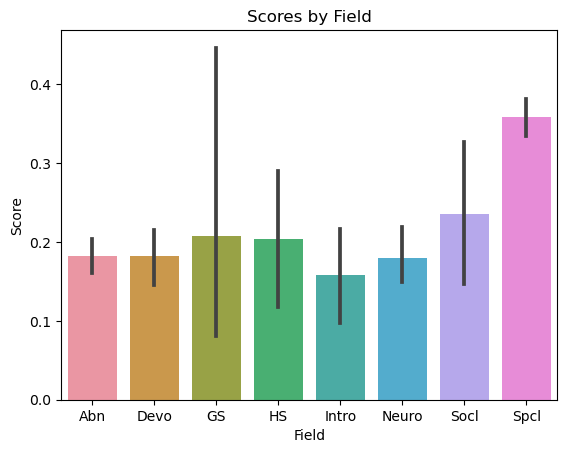

In [55]:
# Field Analysis

# Break up the data frame into fields

field_df = df

all_fields = []

fields_regex = ["Abn.*", "Devo.*", "Intro.*", "Neuro.*", "Socl.*", "Spcl.*", "GS.*", "HS.*"]

authors = ["Barlow", "Brown", "Comer", "Hooley", "Kearney", "Mash", "Nevid", "Nolen-Hoeksema", "Sue", 
                 "Whitbourne", "Berger", "Berk", "Bornstein", "Feldman", "Kail", "Miller", "Devo_Newman", "Santrock", 
                 "Sigelman", "Bernstein", "Coon", "Griggs", "Intro_Kalat", "Morris", "Intro_Myers", "Rathus", "Wade", "Weiten", 
                 "Bear", "Breedlove", "Carlson", "Garrett", "Johnson", "Neuro_Kalat", "Kolb", "Pinel", "Reisberg", "Aronson", 
                 "Baumeister", "Branscombe", "Gilovich", "Gruman", "Socl_Myers", "Rogers", "Zastrow", "Friend", "Gargiulo", "Hardman", 
                 "Heward", "Kuder", "Lewis", "Overton", "Smith", "Turnbull", "Vaughn", 
                 "GS_Newman", "Rothenberg", "Wood", "Carroll", "Crooks", "Hyde", "LeVay", "Yarber"]


for field in fields_regex:
    field_l = field_df[field_df["Textbook"].str.contains(field, regex=True)]
    all_fields.append(field_l)
    

# Find average score per field

field_means = []
field_names = []
author_names = []
                
for textbook in range(len(field_df)):
    if len(field_df[field_df["Textbook"].str.contains("^.+_", regex=True)]) > 0:
        chunk = field_df["Textbook"].iloc[textbook]
        field = chunk.split("_")[0]
        author = chunk.split("_")[1]
        field_names.append(field)
        author_names.append(author)
    
field_df["Author"] = author_names
field_df["Field"] = field_names

print(field_df)

# Find means

field_intermediary_df = field_df[["Score", "Field"]]
field_means_df = field_intermediary_df.groupby(["Field"]).mean()
field_means_df = field_means_df.rename(columns={"Score":"Mean"})
field_stdev_df = field_intermediary_df.groupby(["Field"]).std()
field_stdev_df = field_stdev_df.rename(columns={"Score":"Standard Deviation"})


field_stats_df = pd.concat([field_means_df, field_stdev_df], axis="columns")

display(field_stats_df)

# Do ANOVA

# print(field_df[field_df['Field'] == 'Devo']["Score"])

anova = f_oneway(field_df[field_df['Field'] == 'Abn']["Score"], field_df[field_df['Field'] == 'Devo']['Score'],
        field_df[field_df['Field'] == 'GS']['Score'], field_df[field_df['Field'] == 'HS']['Score'],
        field_df[field_df['Field'] == 'Intro']['Score'], field_df[field_df['Field'] == 'Neuro']['Score'], 
        field_df[field_df['Field'] == 'Socl']['Score'], field_df[field_df['Field'] == 'Spcl']['Score'])

print(anova)

# Post-hoc testing

comp = mc.MultiComparison(df['Score'], df['Field'])
post_hoc_res = comp.tukeyhsd()
display(post_hoc_res.summary())

# Graphing

fig, ax = plt.subplots()

sns.barplot(ax = ax,
    data=field_df, x="Field", y="Score"
)
# ax.bar_label(ax.containers[0], fontsize=10);
# ax.errorbar(mean.index, mean)
ax.set_title("Scores by Field")
plt.savefig('fields_autism.png')

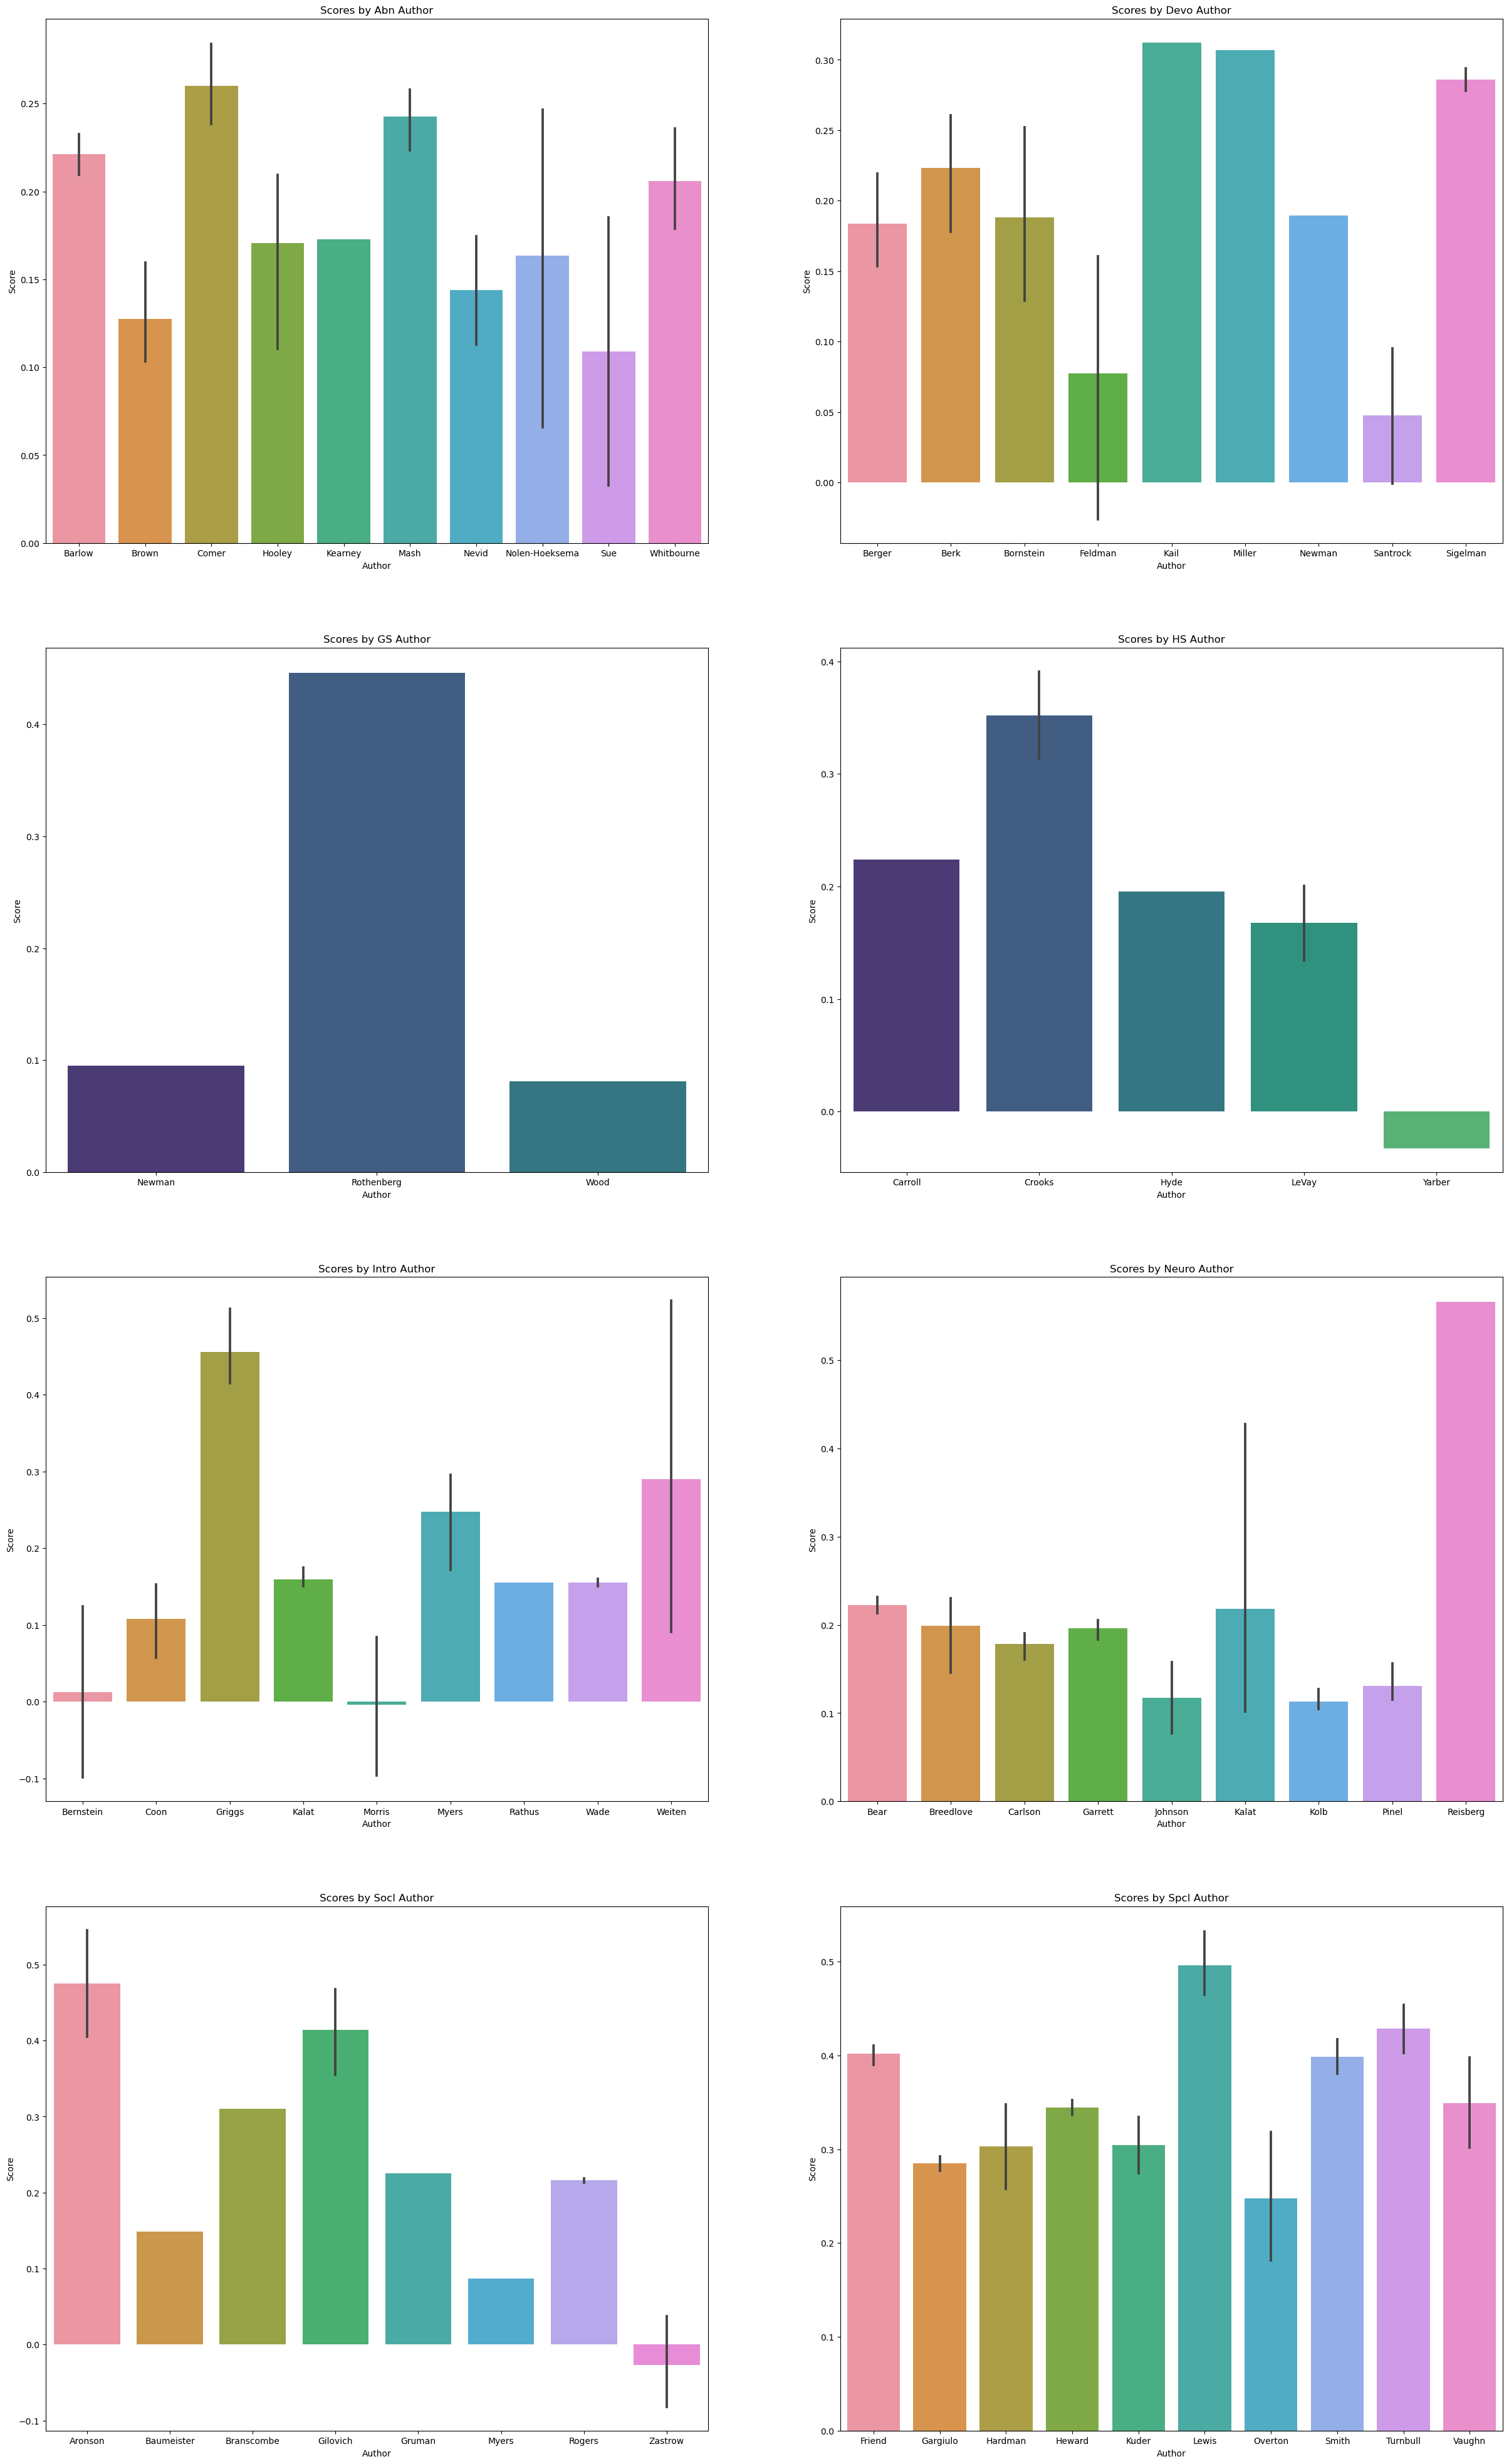

In [35]:
# Author Analysis

# Break up dataframe into authors

author_df = field_df

all_authors = []

for author in authors:
    author_l = author_df[author_df["Textbook"].str.contains(author)]
    all_authors.append(author_l)

author_means_df = author_df

fig, ax = plt.subplots(4, 2, figsize = (30,50))

sns.barplot(ax = ax[0][0],
    data=author_means_df.loc[author_means_df['Field']=='Abn'], x="Author", y="Score"
)
sns.barplot(ax = ax[0][1],
    data=author_means_df.loc[author_means_df['Field']=='Devo'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][0],
    data=author_means_df.loc[author_means_df['Field']=='GS'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][1],
    data=author_means_df.loc[author_means_df['Field']=='HS'], x="Author", y="Score"
)
sns.barplot(ax = ax[2][0],
    data=author_means_df.loc[author_means_df['Field']=='Intro'], x="Author", y="Score"
)
sns.barplot(ax = ax[2][1],
    data=author_means_df.loc[author_means_df['Field']=='Neuro'], x="Author", y="Score"
)
sns.barplot(ax = ax[3][0],
    data=author_means_df.loc[author_means_df['Field']=='Socl'], x="Author", y="Score"
)
sns.barplot(ax = ax[3][1],
    data=author_means_df.loc[author_means_df['Field']=='Spcl'], x="Author", y="Score"
)

ax[0][0].set_title("Scores by Abn Author")
ax[0][1].set_title("Scores by Devo Author")
ax[1][0].set_title("Scores by GS Author")
ax[1][1].set_title("Scores by HS Author")

ax[2][0].set_title("Scores by Intro Author")
ax[2][1].set_title("Scores by Neuro Author")
ax[3][0].set_title("Scores by Socl Author")
ax[3][1].set_title("Scores by Spcl Author")

# for f in fields:
for counter in range(4):
    for subcounter in range(2):
        extent = ax[counter][subcounter].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        title = "authors_autism_" + str(counter) + "_" + str(subcounter) + ".png"
#         ax[counter][subcounter].figure.savefig(title, bbox_inches=extent.expanded(1.2, 1.2))
    counter += 1


C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:19

[]


<Axes: >

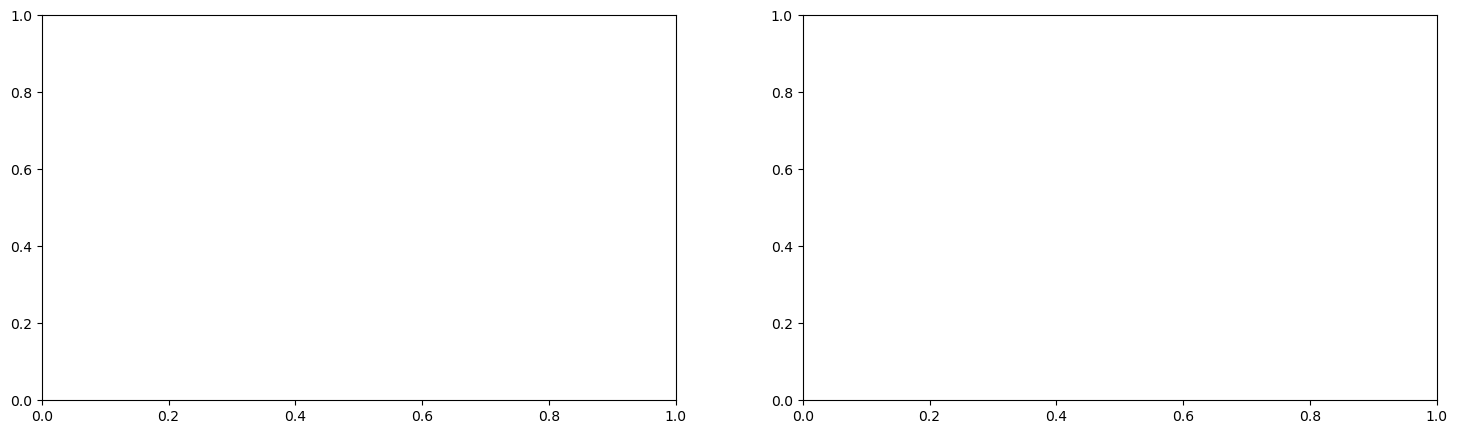

In [38]:
# Edition Analysis

edition_df = df


# Cut up dataframe into chunks by author

all_editions = []
author_total = []
test = []
slope = []
for a_df in all_authors:
    author_name = ""
    alphabetical = a_df["Textbook"].str.split("_").values 
    editions = [] # Get only the edition
    for l in alphabetical:
        editions.append(l[2])
        all_editions.append(l[2])
        author_name = l[0] + "_" + l[1]
        author_total.append(author_name)
    test.append(editions)
    a_df.loc[:,"Edition"] = editions
    a_df.loc[:,"Edition"] = pd.to_numeric(a_df["Edition"])
    a_df = a_df.sort_values("Edition")
    if len(a_df["Edition"]) > 0:
        res = stats.linregress(a_df["Edition"].astype(float), a_df["Score"])
        for l in alphabetical:
            if len(alphabetical) > 1:
                slope.append(res.slope)
            else:
                slope.append(0)

edition_df["Edition"] = all_editions
edition_df["Author"] = author_total
edition_df["Slope"] = slope

# Find consistently positive/negative authors
author_dfs = []
authors = edition_df["Author"].unique()
for author in authors:
    single_author_df = edition_df[edition_df["Author"] == author]
    if single_author_df["Score"].mean() > 1 or single_author_df["Score"].mean() < -1: # if they're consistent, their means will be above or below also
        author_dfs.append(single_author_df)
        
print(author_dfs)

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Break up plot into plot where slopes are negative (<-0.055) and plot where slopes are positive (>0.055)

high = edition_df[edition_df["Slope"] >= 1]
sns.lineplot(ax = axes[0], x="Edition", y="Score", hue="Author", data=high)

low = edition_df[edition_df["Slope"] <= -1]
sns.lineplot(ax = axes[1], x="Edition", y="Score", hue="Author", data=low)

# fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# positive = 

      Year     Score
1988  1988  0.085582
1992  1992  0.101628
1995  1995  0.104407
1996  1996  0.198387
1997  1997  0.068176
1998  1998  0.332039
1999  1999  0.191111
2000  2000  0.249755
2001  2001  0.197347
2002  2002  0.293570
2003  2003  0.244606
2004  2004  0.293217
2005  2005  0.167241
2006  2006  0.231015
2007  2007  0.200622
2008  2008  0.185282
2009  2009  0.164931
2010  2010  0.266796
2011  2011  0.234970
2012  2012  0.261948
2013  2013  0.238315
2014  2014  0.217746
2015  2015  0.185931
2016  2016  0.281926
2017  2017  0.184443
2018  2018  0.246185


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              258.8
Date:                Wed, 27 Mar 2024   Prob (F-statistic):                    1.07e-14
Time:                        13:47:58   Log-Likelihood:                          34.210
No. Observations:                  26   AIC:                                     -66.42
Df Residuals:                      25   BIC:                                     -65.16
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0001   6.47e-06     16.087      0.000    9.08e-05       0.000
==============================================================================
Omnibus:                        1.020   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.601   Jarque-Bera (JB):                0.852
Skew:                          -0.414   Prob(JB):                        0.653
Kurtosis:                       2.683   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[0.00010415]


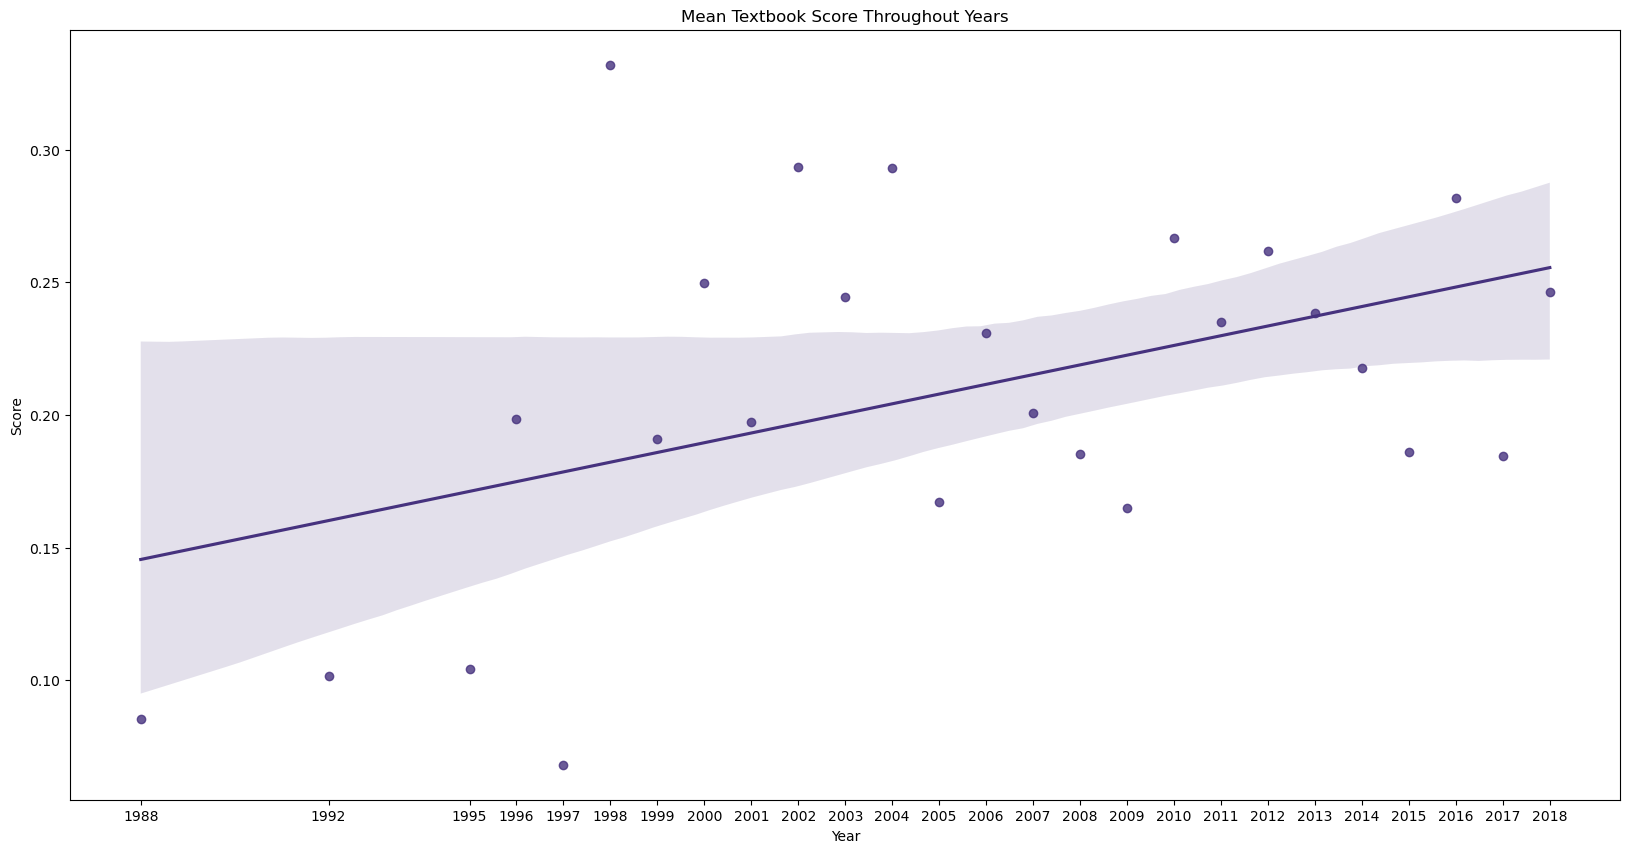

In [56]:
# Year Analysis

year_df = df

# There is a better way to get dates...

textbook_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Textbook_Dump_Autism"

textbooks = os.listdir(textbook_dir)

os.chdir(textbook_dir)

# Function to get full text
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return fullText

# Dictionary filled with years for all the books
book_years = {}
for book in textbooks:
    total_text = getText(book)
    titles = total_text[1]
    no_parentheses = titles[1:len(titles)-1]
    if "," in no_parentheses:
        year = no_parentheses.split(",")[1]
        year = int(year)
        book_years[book] = year

# Overall mean for each year, for all textbooks

# Make new dictionary where year corresponds to a list of textbooks
year_textbooks = {}

# Get all the years
years = []
for book in book_years:
    year = book_years[book]
    if year not in years:
        years.append(year)
years.sort()

# Now, add each year as a key and a list of books as the value
for year in years:
    books = []
    for book in book_years:
        if book_years[book] == year:
            books.append(book)
    year_textbooks[year] = books
    
# Find mean of the books in each year
year_scores = {}
for year in year_textbooks:
    book_list = year_textbooks[year]
    scores = []
    for book in book_list:
        # Find the book in the df
        string_to_query = "Textbook=='" + book + "'"
        score = year_df.query(string_to_query)["Score"]
        scores.append(float(score.iloc[0]))
    average = mean(scores)
    year_scores[year] = [year, average]

# Graph it

graphing_years = pd.DataFrame.from_dict(year_scores, orient="index", columns=["Year", "Score"])
# graphing_years = graphing_years.reset_index()

print(graphing_years)
model = sm.OLS(graphing_years["Score"].tolist(), graphing_years["Year"].tolist())
results = model.fit()
display(results.summary())
print(results.params)

os.chdir(results_dir)

fig, ax = plt.subplots(figsize=(20, 10)) 

# sns.lineplot(ax = ax, x="Year", y="Score", data=graphing_years)
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years);
ax.set_xticks(graphing_years["Year"])
ax.set_title("Mean Textbook Score Throughout Years")
plt.savefig('years_autism.png')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              188.2
Date:                Wed, 27 Mar 2024   Prob (F-statistic):                    2.61e-11
Time:                        13:59:19   Log-Likelihood:                          29.054
No. Observations:                  20   AIC:                                     -56.11
Df Residuals:                      19   BIC:                                     -55.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8.872e-05   6.47e-06     13.720      0.000    7.52e-05       0.000
==============================================================================
Omnibus:                        2.028   Durbin-Watson:                   2.593
Prob(Omnibus):                  0.363   Jarque-Bera (JB):                1.271
Skew:                          -0.616   Prob(JB):                        0.530
Kurtosis:                       2.908   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              139.6
Date:                Wed, 27 Mar 2024   Prob (F-statistic):                    3.37e-10
Time:                        13:59:19   Log-Likelihood:                          25.673
No. Observations:                  20   AIC:                                     -49.35
Df Residuals:                      19   BIC:                                     -48.35
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          9.055e-05   7.66e-06     11.814      0.000    7.45e-05       0.000
==============================================================================
Omnibus:                        2.862   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                1.336
Skew:                           0.237   Prob(JB):                        0.513
Kurtosis:                       1.826   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.765
Method:                 Least Squares   F-statistic:                              17.28
Date:                Wed, 27 Mar 2024   Prob (F-statistic):                      0.0142
Time:                        13:59:19   Log-Likelihood:                          4.2457
No. Observations:                   5   AIC:                                     -6.491
Df Residuals:                       4   BIC:                                     -6.882
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0001   2.57e-05      4.156      0.014    3.55e-05       0.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.258
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.455
Skew:                           0.589   Prob(JB):                        0.797
Kurtosis:                       2.108   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.573
Model:                            OLS   Adj. R-squared (uncentered):              0.544
Method:                 Least Squares   F-statistic:                              20.12
Date:                Wed, 27 Mar 2024   Prob (F-statistic):                    0.000436
Time:                        13:59:20   Log-Likelihood:                          7.5109
No. Observations:                  16   AIC:                                     -13.02
Df Residuals:                      15   BIC:                                     -12.25
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8.717e-05   1.94e-05      4.486      0.000    4.58e-05       0.000
==============================================================================
Omnibus:                        3.057   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                1.871
Skew:                           0.837   Prob(JB):                        0.392
Kurtosis:                       2.916   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              115.9
Date:                Wed, 27 Mar 2024   Prob (F-statistic):                    3.71e-08
Time:                        13:59:20   Log-Likelihood:                          21.515
No. Observations:                  15   AIC:                                     -41.03
Df Residuals:                      14   BIC:                                     -40.32
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8.259e-05   7.67e-06     10.767      0.000    6.61e-05     9.9e-05
==============================================================================
Omnibus:                        0.896   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.430
Skew:                           0.405   Prob(JB):                        0.806
Kurtosis:                       2.822   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              43.11
Date:                Wed, 27 Mar 2024   Prob (F-statistic):                     0.00719
Time:                        13:59:20   Log-Likelihood:                          3.4896
No. Observations:                   4   AIC:                                     -4.979
Df Residuals:                       3   BIC:                                     -5.593
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002    2.9e-05      6.566      0.007    9.81e-05       0.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.145
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.311
Skew:                          -0.450   Prob(JB):                        0.856
Kurtosis:                       1.972   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              702.8
Date:                Wed, 27 Mar 2024   Prob (F-statistic):                    7.09e-16
Time:                        13:59:20   Log-Likelihood:                          27.316
No. Observations:                  19   AIC:                                     -52.63
Df Residuals:                      18   BIC:                                     -51.69
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002   6.74e-06     26.510      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.311   Durbin-Watson:                   2.338
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.216
Skew:                           0.222   Prob(JB):                        0.898
Kurtosis:                       2.726   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

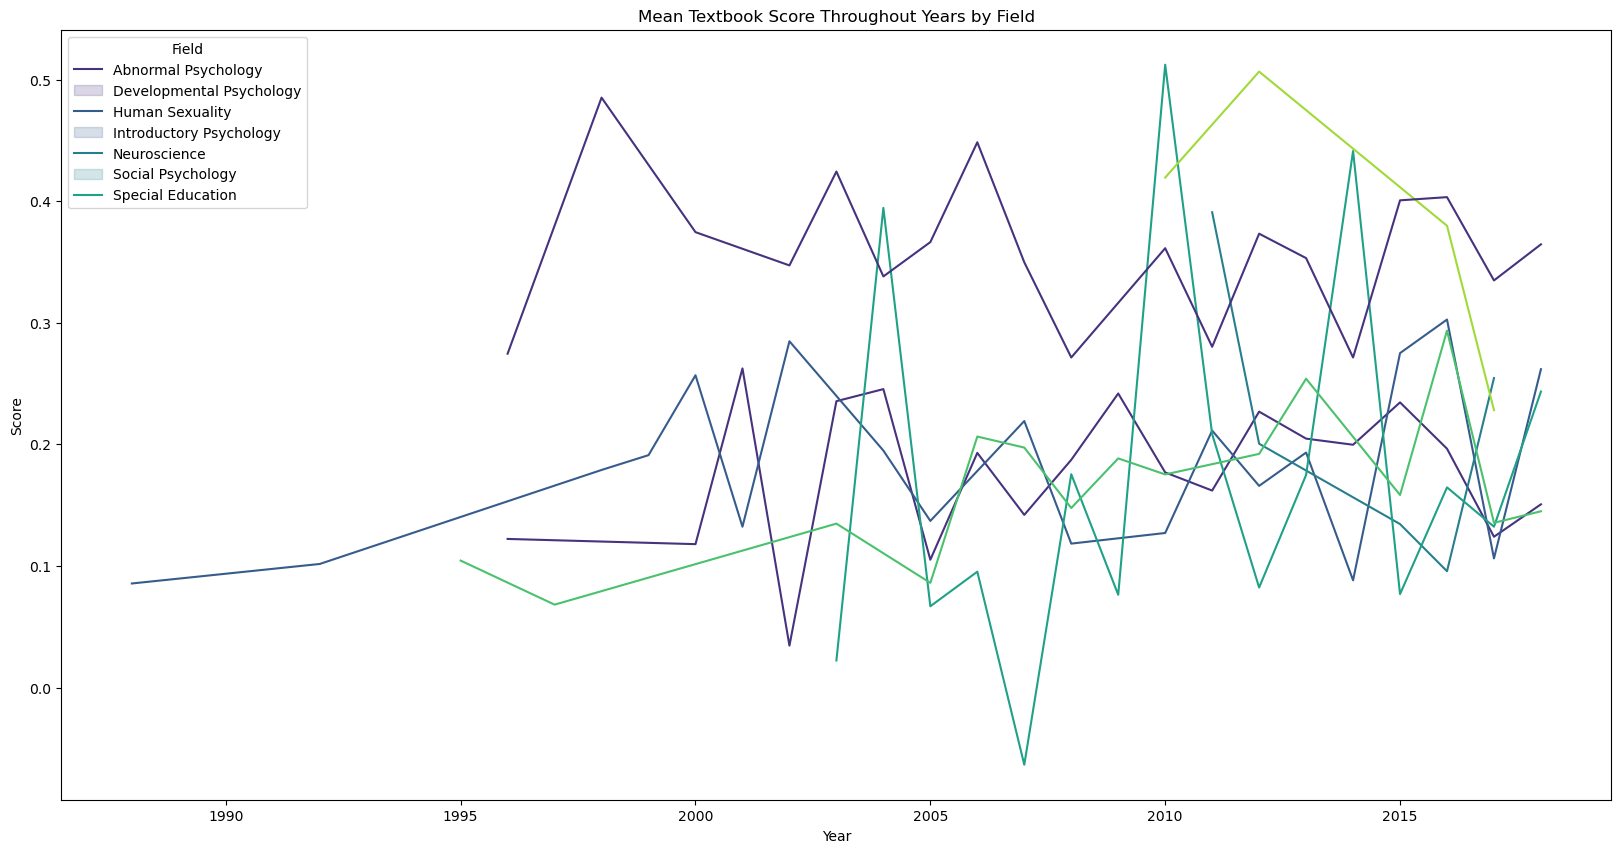

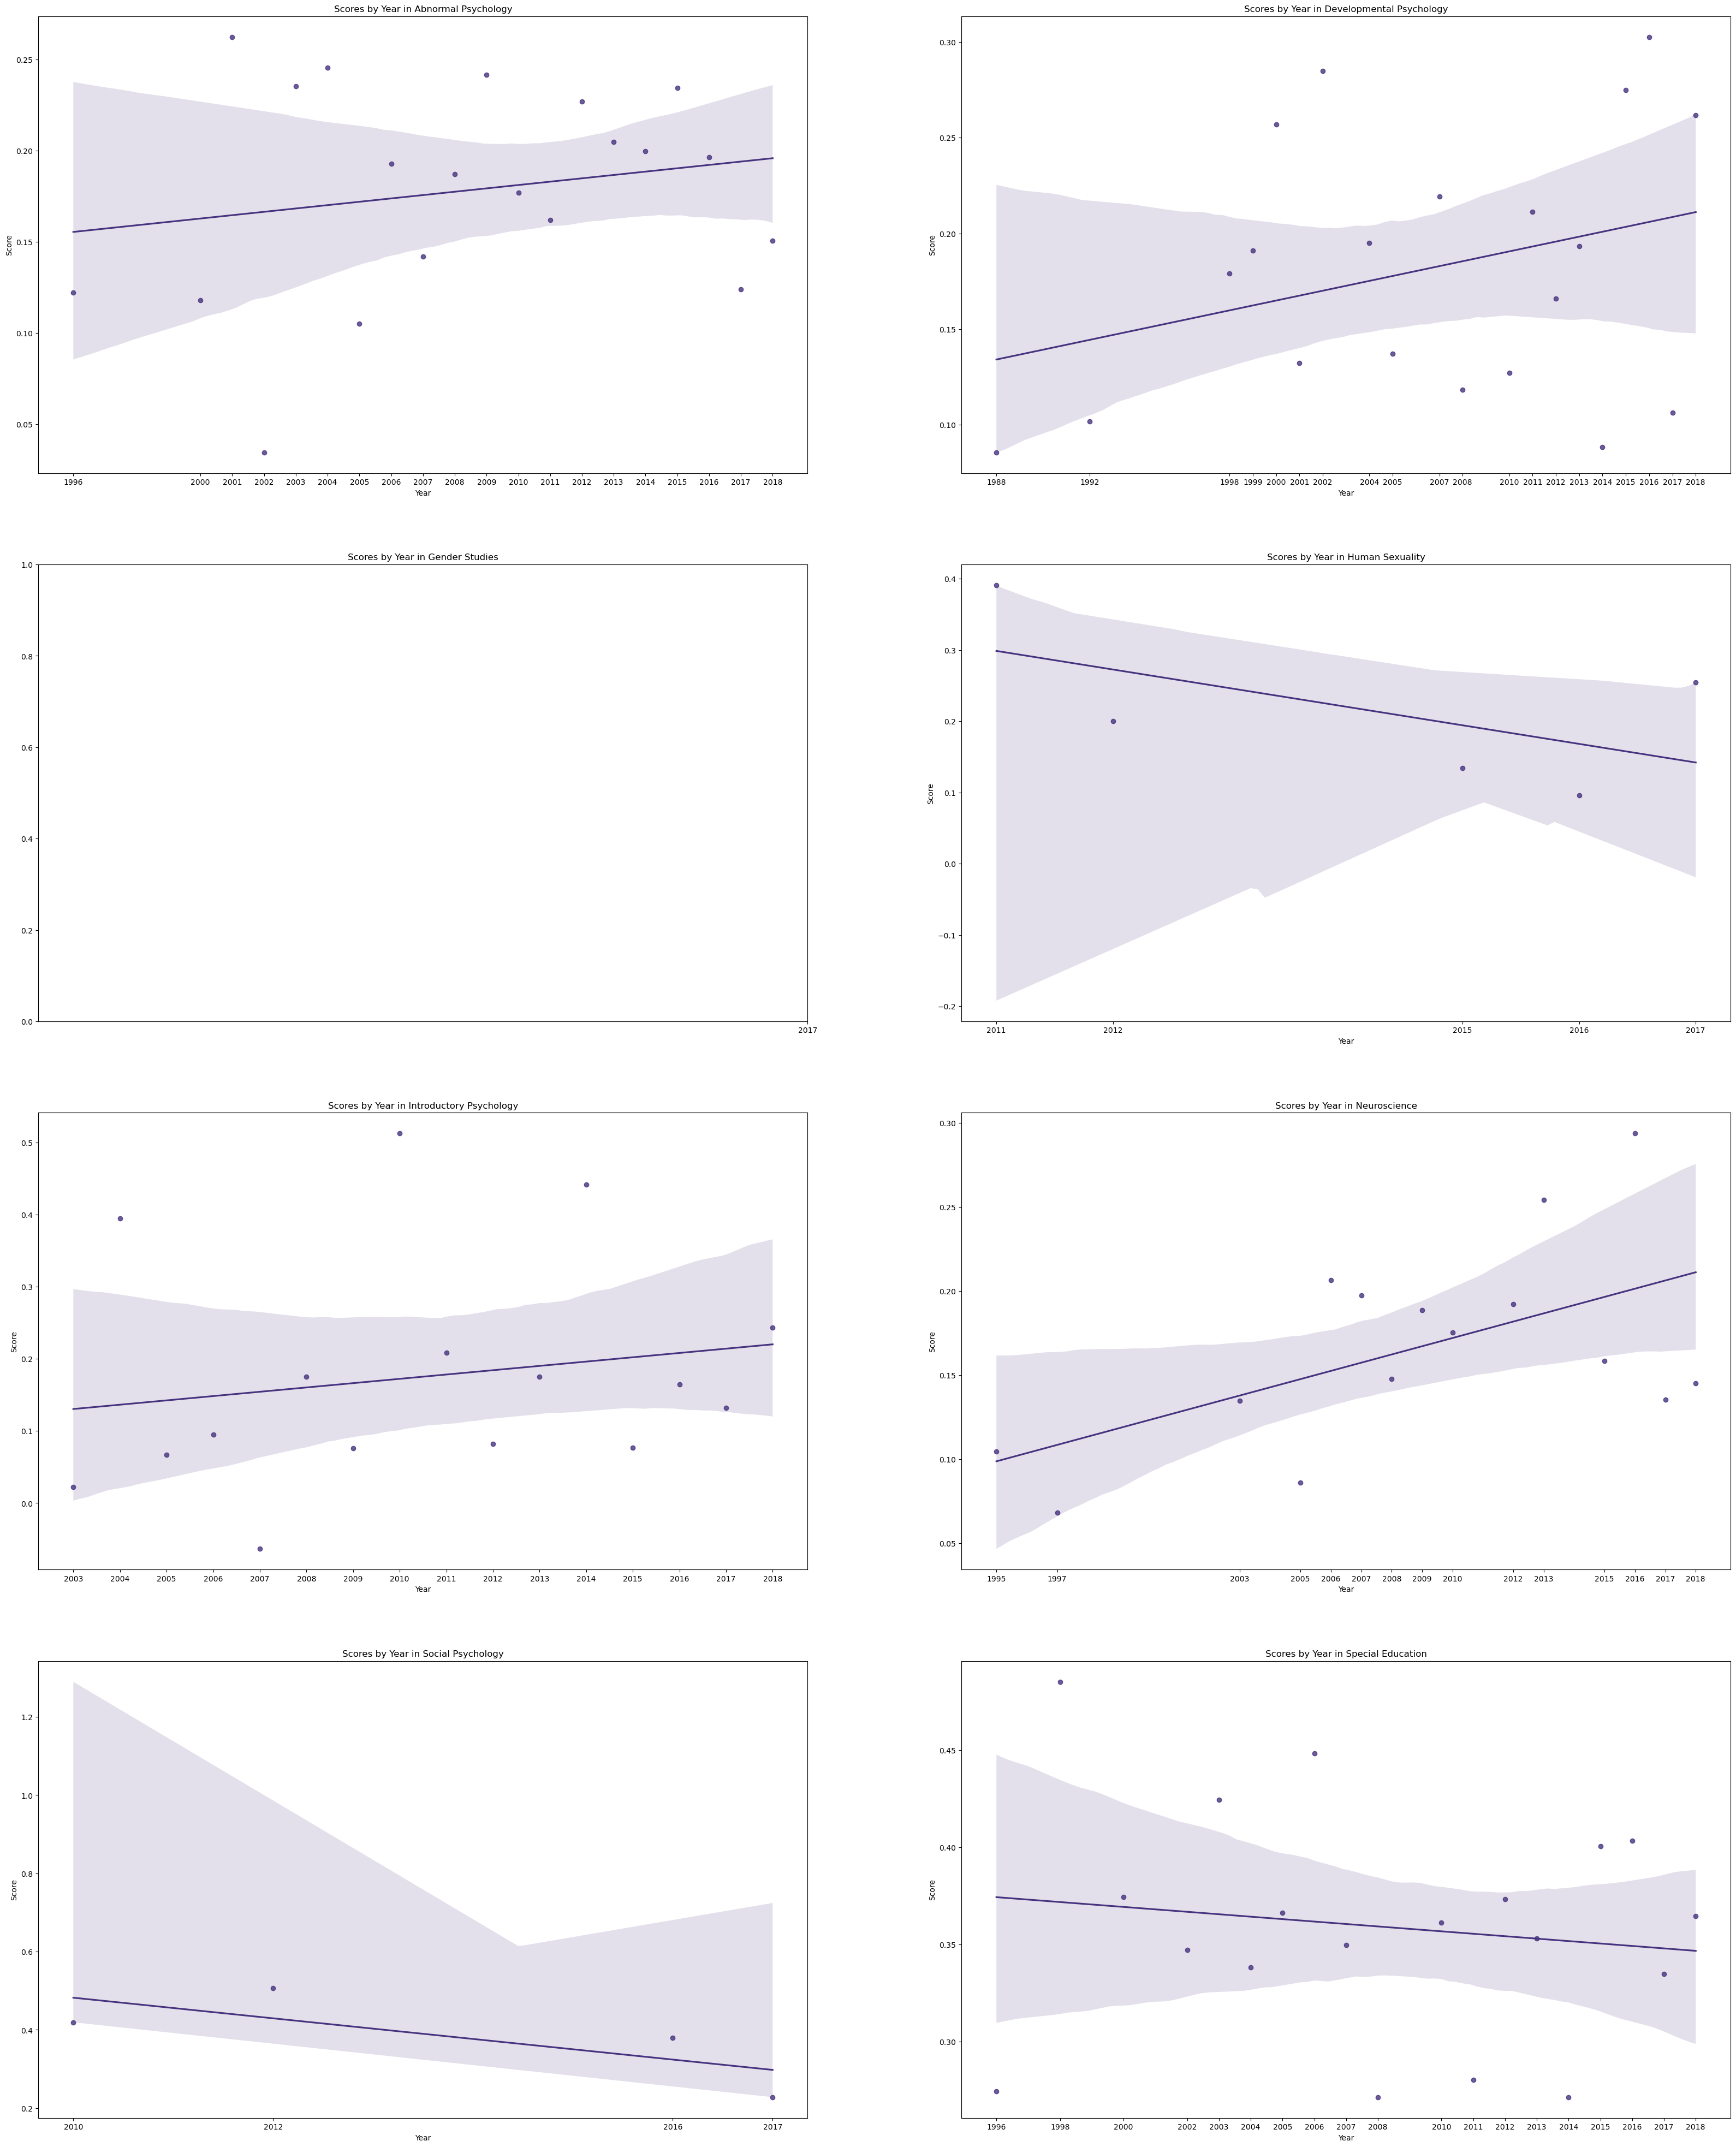

In [58]:
# Years by field

# Year Analysis

year_df = df

# Get a field from the big data frame
def getFieldDF(df, field):
    df1 = df[df['Field'] == field]
    return df1

# Get all the fields
fields = df.Field.unique()

# Make a list where each element is a dataframe with only one field
field_dfs = []
for f in fields:
    f_df = getFieldDF(year_df, f)
    field_dfs.append(f_df)


# print(field_dfs)

# There is a better way to get dates...

textbook_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Textbook_Dump_Autism"

textbooks = os.listdir(textbook_dir)

os.chdir(textbook_dir)

# Function to get full text
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return fullText

# Dictionary filled with years for all the books
book_years = {}
for book in textbooks:
    total_text = getText(book)
    titles = total_text[1]
    no_parentheses = titles[1:len(titles)-1]
    if "," in no_parentheses:
        year = no_parentheses.split(",")[1]
        year = int(year)
        book_years[book] = year
        
# Make new dictionary where year corresponds to a list of textbooks
year_textbooks = {}

# Get all the years
years = []
for book in book_years:
    year = book_years[book]
    if year not in years:
        years.append(year)
years.sort()

# Now, add each year as a key and a list of books as the value
for year in years:
    books = []
    for book in book_years:
        if book_years[book] == year:
            books.append(book)
    year_textbooks[year] = books

def getYear(book_df):

    # Overall mean for each year, for all textbooks in a field

    # Find mean of the books in each year
    year_scores = {}
    for year in year_textbooks:
        book_list = year_textbooks[year]
        scores = []
        for book in book_list:
            # Find the book in the df
            string_to_query = "Textbook=='" + book + "'"
            score = book_df.query(string_to_query)["Score"]
            # If the score exists (that is, if the book is in this dataframe)
            if len(score) > 0:
                scores.append(float(score.iloc[0]))
        if len(scores) > 0:
            average = mean(scores)
            year_scores[year] = [year, average]
    
    return year_scores

# Get the years for each field dataframe
year_scores = []
for f_df in field_dfs:
#     print(f_df)
    year_score = getYear(f_df)
#     print(year_score)
    graphing_years = pd.DataFrame.from_dict(year_score, orient="index", columns=["Year", "Score"])
    graphing_years["Field"] = f_df["Field"].iloc[0] # Include the field
    graphing_years = graphing_years.reset_index()
    year_scores.append(graphing_years)

# Graph it




# print(year_scores)

os.chdir(results_dir)

fig, ax = plt.subplots(figsize=(20, 10)) 

sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[0])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[1])
# sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[2])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[3])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[4])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[5])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[6])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[7])

# ax.set_xticks(book_years.values())
ax.set_title("Mean Textbook Score Throughout Years by Field")

ax.legend(title="Field", labels=["Abnormal Psychology", "Developmental Psychology", "Human Sexuality", 
                                  "Introductory Psychology", "Neuroscience", "Social Psychology", "Special Education"])
plt.savefig('years_autism_fields.png')

fig, ax = plt.subplots(4, 2, figsize = (40,50))

sns.regplot(ax = ax[0][0],
    data=year_scores[0], x="Year", y="Score" # abn
)

model = sm.OLS(year_scores[0]["Score"].tolist(), year_scores[0]["Year"].tolist())
results = model.fit()
display(results.summary())

sns.regplot(ax = ax[0][1],
    data=year_scores[1], x="Year", y="Score" # devo
)

model = sm.OLS(year_scores[1]["Score"].tolist(), year_scores[1]["Year"].tolist())
results = model.fit()
display(results.summary())

# sns.regplot(ax = ax[1][0],
#     data=year_scores[2], x="Year", y="Score" # gs
# )

# model = sm.OLS(year_scores[2]["Score"].tolist(), year_scores[2]["Year"].tolist())
# results = model.fit()
# print(results.summary())

sns.regplot(ax = ax[1][1],
    data=year_scores[3], x="Year", y="Score" # hs
)

model = sm.OLS(year_scores[3]["Score"].tolist(), year_scores[3]["Year"].tolist())
results = model.fit()
display(results.summary())

sns.regplot(ax = ax[2][0],
    data=year_scores[4], x="Year", y="Score" # intro
)

model = sm.OLS(year_scores[4]["Score"].tolist(), year_scores[4]["Year"].tolist())
results = model.fit()
display(results.summary())

sns.regplot(ax = ax[2][1],
    data=year_scores[5], x="Year", y="Score" # neuro
)

model = sm.OLS(year_scores[5]["Score"].tolist(), year_scores[5]["Year"].tolist())
results = model.fit()
display(results.summary())

sns.regplot(ax = ax[3][0],
    data=year_scores[6], x="Year", y="Score" # socl
)

model = sm.OLS(year_scores[6]["Score"].tolist(), year_scores[6]["Year"].tolist())
results = model.fit()
display(results.summary())

sns.regplot(ax = ax[3][1],
    data=year_scores[7], x="Year", y="Score" # spcl
)

model = sm.OLS(year_scores[7]["Score"].tolist(), year_scores[7]["Year"].tolist())
results = model.fit()
display(results.summary())


ax[0][0].set_title("Scores by Year in Abnormal Psychology")
ax[0][0].set_xticks(year_scores[0]["Year"])

ax[0][1].set_title("Scores by Year in Developmental Psychology")
ax[0][1].set_xticks(year_scores[1]["Year"])

ax[1][0].set_title("Scores by Year in Gender Studies")
ax[1][0].set_xticks(year_scores[2]["Year"])

ax[1][1].set_title("Scores by Year in Human Sexuality")
ax[1][1].set_xticks(year_scores[3]["Year"])

ax[2][0].set_title("Scores by Year in Introductory Psychology")
ax[2][0].set_xticks(year_scores[4]["Year"])

ax[2][1].set_title("Scores by Year in Neuroscience")
ax[2][1].set_xticks(year_scores[5]["Year"])

ax[3][0].set_title("Scores by Year in Social Psychology")
ax[3][0].set_xticks(year_scores[6]["Year"])

ax[3][1].set_title("Scores by Year in Special Education")
ax[3][1].set_xticks(year_scores[7]["Year"])


# for f in fields:
for counter in range(4):
    for subcounter in range(2):
        extent = ax[counter][subcounter].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        title = "years_autism_fields" + str(counter) + "_" + str(subcounter) + ".png"
        ax[counter][subcounter].figure.savefig(title, bbox_inches=extent.expanded(1.2, 1.2))
    counter += 1



In [9]:
# # Does length of passage matter?

# os.chdir(textbook_dir)

# # Function to get full text
# def getText(filename):
#     doc = docx.Document(filename)
#     fullText = []
#     for para in doc.paragraphs:
#         fullText.append(para.text)
#     return fullText

# # Dictionary filled with text for all the books, minus the titles
# title_text = {}
# for book in textbooks:
#     total_text = getText(book)
#     text_without_title = total_text[4:]
#     for piece in text_without_title:
#         if piece == '':
#             text_without_title.remove(piece) # Does not get rid of all whitespace, but ah well.
# #     text_without_title.remove('')
#     title_text[book] = text_without_title
    
    
# # Remove stop words from each book

# stopwords_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Stop_Words" 

# os.chdir(stopwords_dir)

# f = open("stop_words_english_original.txt", "r", encoding="utf-8")
# stopwords = []
# for text in f:
#     text = text.replace('\n', '')
#     stopwords.append(text)


# punc = '''!()[]{};:'-"\,<>./?@#$%^&*_~''' # Must include "-" in words... or not?

# # Function to clean up text and remove stopwords
# def clean(book):
#     text_list = title_text[book]
#     new_text_list = []
    
#     # Clean up text
#     for text in text_list:
#         text = text.strip()
#         text = text.lower()
#         text = text.split(' ')
#         new_text_list.append(text)


#     newer_text_list = []
    
#     # Remove punctuation
#     for sentence in new_text_list:
#         for word in sentence:
#             for char in punc:
#                 if char in word:
#                     word = word.replace(char, '')
#             newer_text_list.append(word)
                
#     # Remove stop words
#     newest_text_list = []
#     for words in newer_text_list:
#         if words not in stopwords:
#             newest_text_list.append(words)

#     # Remove blanks
#     for w in newest_text_list:
#         if len(w) == 0:
#             newest_text_list.remove(w)
            
#     return newest_text_list

# # Update all the books with their clean, stopword-less counterparts

# clean_texts = {}
# for book in title_text:
#     newest_text_list = clean(book)
#     clean_texts[book] = newest_text_list
    
# # Find length of all texts
# lengths = {}
# for book in clean_texts:
#     length_of_text = len(clean_texts[book])
#     lengths[book] = length_of_text
    
# print(lengths)

In [10]:
# print(max(lengths.values()))

In [11]:
# df["Field"] = df["Author"].apply(lambda x : x.split("_")[0])

In [12]:
# length_df = df
# print(length_df)

# # Add the lengths of the books to the dataframe
# length_df["Length"] = length_df["Textbook"].map(lengths)

# print(length_df[length_df["Length"] > 4000])

In [13]:


# # Correlation between score and length?
# fig, ax = plt.subplots(1, 2, figsize=(15, 8)) 

# sns.scatterplot(ax=ax[0], data=length_df, x="Length", y="Score", hue="Field")
# ax[0].set_title("Length of Textbook vs. Score")

# # Remove special education and abnormal
# secondary_df = length_df[length_df["Field"] != "Spcl"]
# tertiary_df = secondary_df[secondary_df["Field"] != "Abn"]
# sns.scatterplot(ax=ax[1], data=tertiary_df, x="Length", y="Score", hue="Field")
# ax[1].set_title("Length of Textbook vs. Score (Excluding Special Ed. and Abnormal)")

In [14]:
# # What about raw scores and length?
# os.chdir(results_dir)

# raw_df = pd.read_csv("raw_sentiments_01_04_2024.csv", low_memory=False)

# print(raw_df)

# raw_df["Length"] = length_df["Length"]
# raw_df["Field"] = length_df["Field"]

# # length_df2 = length_df

# # # Add the lengths of the books to the dataframe
# # length_df2["Raw_Score"] = raw_df["Raw_Score"].map(books)

# # print(length_df2)

# # Correlation between score and length?
# fig, ax = plt.subplots(1, 2, figsize=(15, 4)) 

# sns.scatterplot(ax=ax[0], data=raw_df, x="Length", y="Raw_Score", hue="Field")
# ax[0].set_title("Length of Textbook vs. Raw Score")

# # Remove special education and abnormal
# secondary_df2 = raw_df[raw_df["Field"] != "Spcl"]
# tertiary_df2 = secondary_df2[secondary_df2["Field"] != "Abn"]
# sns.scatterplot(ax=ax[1], data=tertiary_df2, x="Length", y="Raw_Score", hue="Field")
# ax[1].set_title("Length of Textbook vs. Raw Score (Excluding Special Ed. and Abnormal)")

In [15]:
# # Overall

# overall_df = df

# overall_df["Year"] = overall_df["Textbook"].map(book_years)

# fields = []
# for author in overall_df["Author"]:
#     field = author.split("_")[0]
#     fields.append(field)

# overall_df["Field"] = fields

# print(overall_df)

# fig, ax = plt.subplots(figsize=(20,20))

# sns.scatterplot(data=overall_df, x="Year", y="Score", hue="Field")